In [1]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.2 MB/s eta 0:00:00


In [2]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [4]:
#The file Sikkim_Monthly_Arrivals.csv needs to uploaded to the runtime files first
df = pd.read_csv('Sikkim_Monthly_Arrivals.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      121 non-null    datetime64[ns]
 1   Domestic  121 non-null    int64         
 2   Foreign   121 non-null    int64         
 3   Total     121 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.9 KB


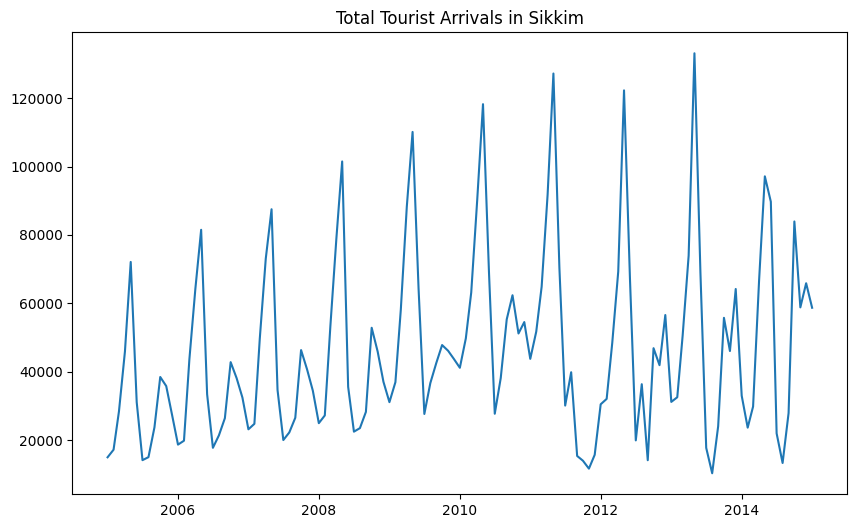

In [6]:
plt.plot(df['Date'], df['Total'])
plt.title("Total Tourist Arrivals in Sikkim")
plt.show()

In [7]:
#Splitting the training and testing data
train_data, test_data = df[df['Date'] < '2014-01-01']['Total'], df[df['Date'] >= '2014-01-01']['Total']

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2033.615, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2039.431, Time=0.08 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=2053.722, Time=0.16 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2032.635, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=2039.529, Time=0.13 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=2050.146, Time=0.45 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2034.967, Time=0.12 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=2037.887, Time=0.41 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=2048.599, Time=0.58 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2030.639, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2029.307, Time=0.09 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2031.288, Time=0.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2029.514, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2031.294, Time=0.15 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.02 sec


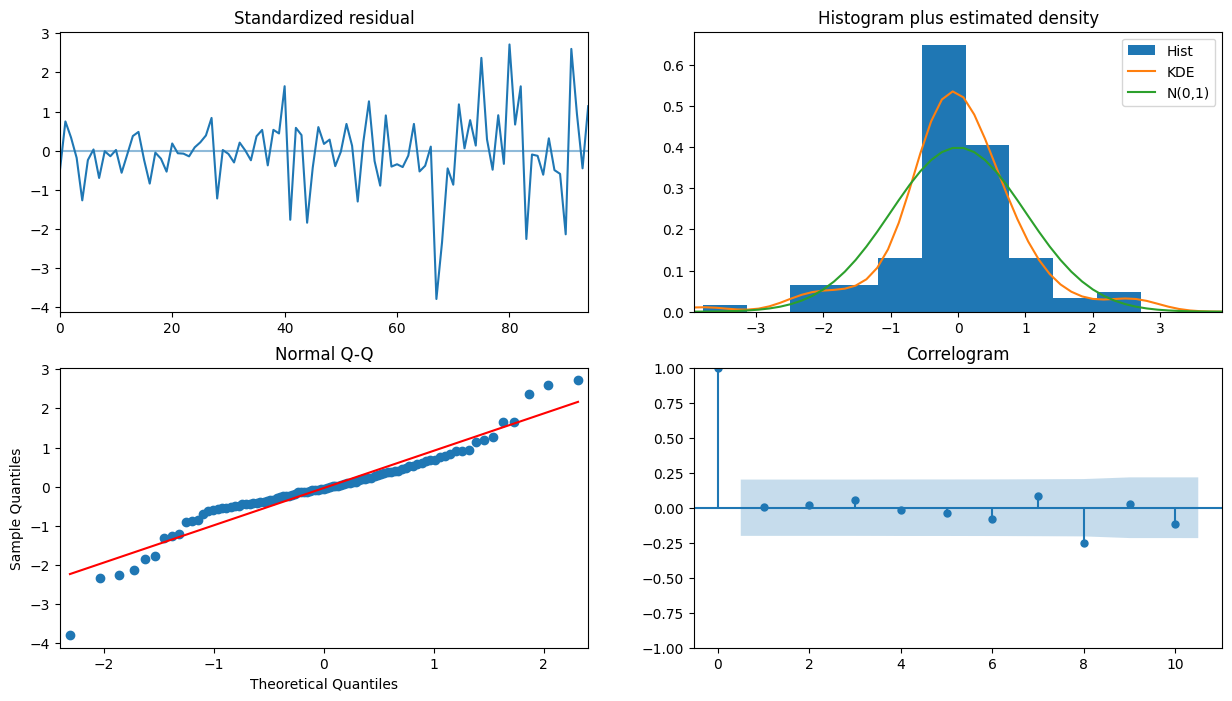

In [8]:
#Using autoARIMA to determine the best model parameters
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=20, max_q=20, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise = False)
print(model_autoARIMA.summary())
print("\n")
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

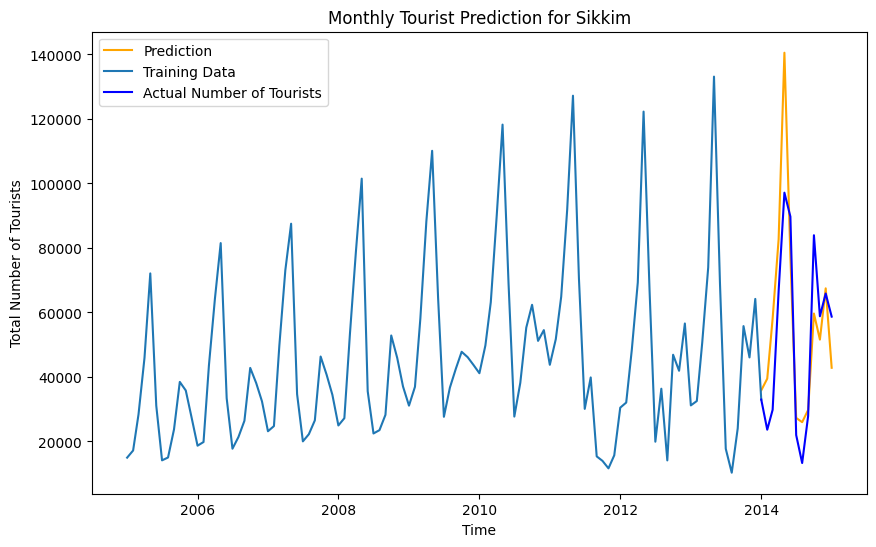

In [60]:
#Applying the seasonal ARIMA model with the parameters as shown below
model = SARIMAX(train_data, order=(4, 1, 0), seasonal_order = (0, 1, 1, 12))
model = model.fit()
predict = model.predict(108, 120)
predict = round(predict).astype(int)
plt.plot(df[df['Date'] >= '2014-01-01']['Date'] ,predict , label = 'Prediction', color = 'orange')
plt.plot(df[df['Date'] <= '2014-01-01']['Date'], df[df['Date'] <= '2014-01-01']['Total'] , label = 'Training Data')
plt.plot(df[df['Date'] >= '2014-01-01']['Date'], test_data , label = 'Actual Number of Tourists', color = 'blue')
plt.xlabel('Time')
plt.ylabel('Total Number of Tourists')
plt.title('Monthly Tourist Prediction for Sikkim')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import r2_score
r2_score(test_data, predict)

0.5374214746479806